In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [46]:
path="C:\\Users\\bachiler\\desktop\\time series\\bitcoin_data.csv"
df=pd.read_csv(path)
df.drop(columns=['Unnamed: 0'],inplace=True)

In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').drop_duplicates('Date')
df.drop(df[df['Date']<'2021-01-01'].index,inplace=True)
df.set_index('Date', inplace=True)

Text(0.5, 1.0, 'bitcoin close data')

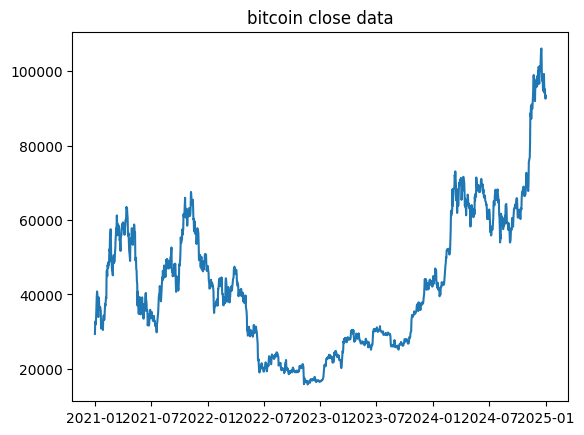

In [48]:
plt.plot(df["Close"])
plt.title('bitcoin close data')

In [49]:
from  sklearn.ensemble import IsolationForest
df['z_anom'] = (np.abs((df['Close'] - df['Close'].mean()) / df['Close'].std()) > 3).astype(int)

iso = IsolationForest(contamination=0.01)
df['iso_anom'] = (iso.fit_predict(df[['Close','High','Low','Open','Volume']]) == -1).astype(int)

df['is_anomaly'] = ((df['z_anom'] + df['iso_anom']) > 0).astype(int)
df.drop(columns=["z_anom","iso_anom"],axis=1)

,Close,High,Low,Open,Volume,is_anomaly
Date,,,,,,
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359,0
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765,0
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202,0
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344,0
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782,0
...,...,...,...,...,...,...
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,0
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,0
2024-12-29,93530.226562,95174.875000,92881.789062,95174.054688,29635885267,0


In [50]:
lags = [1, 2, 3, 7, 14, 21, 30]   # strong for crypto

for lag in lags:
    df[f"return_lag_{lag}"] = df["Close"].shift(lag)

df = df.dropna()
df['Close_roll_7'] = df['Close'].rolling(7).mean()
df['Vol_roll_7'] = df['Volume'].rolling(7).mean()
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day


    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X
create_features(df)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Date,,,,,,,
2021-01-31,0,6,1,1,2021,31,31
2021-02-01,0,0,1,2,2021,32,1
2021-02-02,0,1,1,2,2021,33,2
2021-02-03,0,2,1,2,2021,34,3
2021-02-04,0,3,1,2,2021,35,4
...,...,...,...,...,...,...,...
2024-12-27,0,4,4,12,2024,362,27
2024-12-28,0,5,4,12,2024,363,28
2024-12-29,0,6,4,12,2024,364,29


In [51]:
df["target"]=df.Close.shift(-1)
df.dropna(inplace=True)

df.drop(columns=["z_anom","iso_anom"],axis=1)
df

,Close,High,Low,Open,Volume,z_anom,iso_anom,is_anomaly,return_lag_1,return_lag_2,...,Vol_roll_7,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,target
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-06,39266.011719,40846.546875,38138.386719,38138.386719,71326033653,0,0,0,38144.308594,36926.066406,...,6.245322e+10,2021-02-06,0,5,1,2,2021,37,6,38903.441406
2021-02-07,38903.441406,39621.835938,37446.152344,39250.191406,65500641143,0,0,0,39266.011719,38144.308594,...,6.427409e+10,2021-02-07,0,6,1,2,2021,38,7,46196.464844
2021-02-08,46196.464844,46203.929688,38076.324219,38886.828125,101467222687,0,0,0,38903.441406,39266.011719,...,6.999792e+10,2021-02-08,0,0,1,2,2021,39,8,46481.105469
2021-02-09,46481.105469,48003.722656,45166.960938,46184.992188,91809846886,0,0,0,46196.464844,38903.441406,...,7.410096e+10,2021-02-09,0,1,1,2,2021,40,9,44918.183594
2021-02-10,44918.183594,47145.566406,43881.152344,46469.761719,87301089896,0,0,0,46481.105469,46196.464844,...,7.783443e+10,2021-02-10,0,2,1,2,2021,41,10,47909.332031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,0,0,0,99299.195312,98676.093750,...,5.623668e+10,2024-12-26,0,3,4,12,2024,361,26,94164.859375
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,0,0,0,95795.515625,99299.195312,...,4.863465e+10,2024-12-27,0,4,4,12,2024,362,27,95163.929688
2024-12-28,95163.929688,95525.898438,94014.289062,94160.187500,24107436185,0,0,0,94164.859375,95795.515625,...,4.468353e+10,2024-12-28,0,5,4,12,2024,363,28,93530.226562


In [69]:
def train_test_split(data,test_percent):
    data=data.values
    n=int(len(data)*(1-test_percent))
    return data[:n],data[n:]

In [70]:
df["date"]=df["date"].view("int64")

C:\Users\bachiler\AppData\Local\Temp\ipykernel_14772\2701299260.py:1: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df["date"]=df["date"].view("int64")


In [71]:
train,test=train_test_split(df,0.2)

In [72]:
x_train=train[:,:-1]
y_train=train[:,-1]
x_test=test[:,:-1]
y_test=test[:,-1]

In [73]:
scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled =scaler.fit_transform(x_test)

In [12]:
from sklearn.svm import SVR
svr=SVR(kernel ="rbf")
svr.fit(x_train_scaled,y_train)

NameError: name 'x_train_scaled' is not defined

In [75]:
val=np.array(x_test_scaled[0]).reshape(1,-1)
pred=svr.predict(val)
pred

array([34584.07560103])

In [76]:
def svr_predict(x_train,y_train,val):
    svr=SVR(kernel ="rbf")
    svr.fit(x_train,y_train)
    val=np.array(val).reshape(1,-1)
    pred=svr.predict(val)
    return pred[0]
svr_predict(x_train_scaled,y_train,x_test_scaled[0])

np.float64(34584.075601028744)

In [82]:
predictions =[]
history=[x for x in train]
for i in range(len(test)):
    pred=svr_predict(x_train_scaled,y_train,x_test_scaled[i])
    #pred=svr_predict(history,x_test)
    predictions.append(pred)
    history.append(x_test_scaled[i])
    

In [81]:
predictions 

[np.float64(34584.075601028744)]

In [63]:
def mape(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    mape=np.mean(np.abs((actual-pred)/actual))*100
    return mape

In [86]:
len(x_test_scaled)

285

In [89]:
mse=mean_squared_error(y_test,predictions)
error=np.sqrt(mse)
MAPE=mape(y_test,predictions)

In [91]:
print("rmse "f"{error}")
print("mape "f"{MAPE}")

rmse 37807.19670084101
mape 49.27710251744552


In [44]:
print("rmse "f"{error}")
print("mape "f"{MAPE}")

rmse 34595.17397906548
mape 44.85161682777167


In [4]:
path="C:\\Users\\bachiler\\desktop\\time series\\bitcoin_data.csv"
df = pd.read_csv(path)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ts = df['Close']


In [6]:
df_svm = pd.DataFrame()
df_svm['Close'] = ts
df_svm['lag1'] = ts.shift(1)
df_svm['lag2'] = ts.shift(2)
df_svm['lag3'] = ts.shift(3)
df_svm['lag7'] = ts.shift(7)
df_svm['lag14'] = ts.shift(14)


In [7]:
df_svm['ma7'] = ts.rolling(7).mean()
df_svm['ma14'] = ts.rolling(14).mean()

df_svm.dropna(inplace=True)

In [8]:
split = int(len(df_svm) * 0.8)

train = df_svm.iloc[:split]
test = df_svm.iloc[split:]

X_train = train.drop('Close', axis=1)
y_train = train['Close']

X_test = test.drop('Close', axis=1)
y_test = test['Close']


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
train=X_train_scaled
test=X_test_scaled

In [13]:
model = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=0.1)
model.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [14]:
predictions = model.predict(X_test_scaled)

In [17]:
rmse = mean_squared_error(y_test, predictions)
mse=np.sqrt(rmse)
mape = mean_absolute_percentage_error(y_test, predictions) * 100

print("SVM RMSE:", mse)
print("SVM MAPE (%):", mape)

NameError: name 'mean_absolute_percentage_error' is not defined

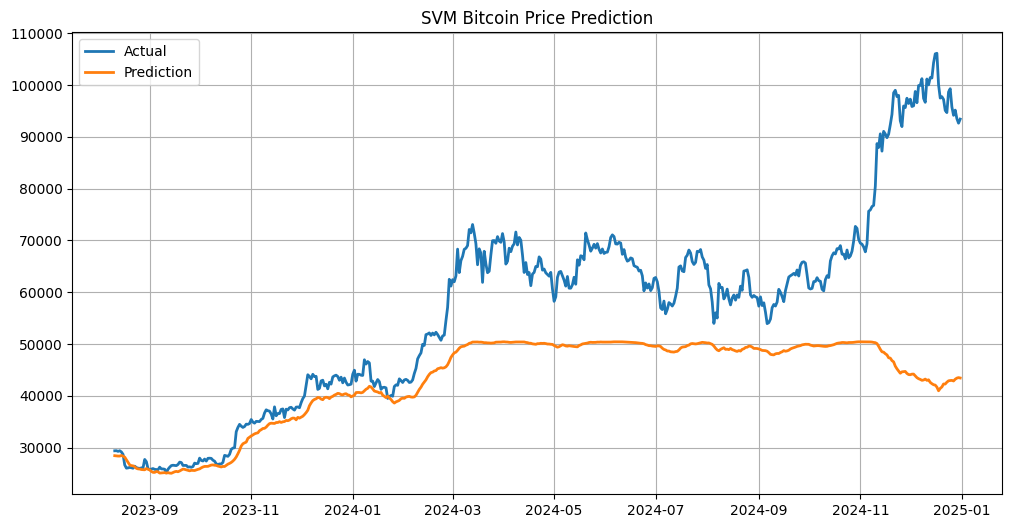

In [18]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', linewidth=2)
plt.plot(y_test.index, predictions, label='Prediction', linewidth=2)
plt.title("SVM Bitcoin Price Prediction")
plt.grid(True)
plt.legend()
plt.show()